1) What is unsupervised learning in the context of machine learning ?

Ans: Unsupervised Learning in Machine learning is a type of algorithm which studies the data without any labelled output aiming to discover a uncover pattern or to study just the trend

2.  How does K-Means clustering algorithm work ?

Ans: K-Means Clustering works by partioning the data into K groups based on their similarities, using an interactive process to minimize the distance between the datapoint and the assigned centroid

3.  Explain the concept of a dendrogram in hierarchical clustering

Ans: Dendograms are tree like structure used in hierarchical clustering to visualize how the data points are grouped step by step

4.  What is the main difference between K-Means and Hierarchical Clustering ?

Ans: K Means are faster and good for large dataset but it requires you to know the number of group / cluster before hand.

Hierarchical on the other hand gives full picture how a datapoint is related to a group but can be computationally expensive

5.  What are the advantages of DBSCAN over K-Means ?

Ans: The advantages of DBSCAN over K-Means is that it can handle outlier and can also work with non linear type of datapoint forming a circle or anything, and unlike the K-Means the number of cluster is not required to be know before hand

6. When would you use Silhouette Score in clustering ?

Ans: Silhouette Score calculate how similar is a datapoints with its own cluster versus others. It's value ranges between -1 to 1. If the value is closer to 1 means it is a good cluster

7. What are the limitations of Hierarchical Clustering ?

Ans: It is inefficient for large dataset

        It is sensitive to outliers and noise

8. Why is feature scaling important in clustering algorithms like K-Means ?

Ans: Feature scaling is important to make sure that every feature contributes equally to the distance calculation

9.  How does DBSCAN identify noise points ?

Ans: DBSCAN identifies outliers as that data point that does not belong to any cluster as they lack the number of data point specified within a given radius

10.  Define inertia in the context of K-Means.

Ans: Inertia in the context of K-Means is defined as the metrics which tells us how well the data is distributed around its respective centroid

11. What is the elbow method in K-Means clustering ?

Ans: Elbow method in K-Means clustering is used for calculating the optimal K (Number of cluster value). It uses the metrics of Within Cluster Square of Sum (WCSS) to calculate the optimal K.

12. Describe the concept of "density" in DBSCAN.

Ans: The concept of density in DBSCAN refers to how closely the data point is packed in a region. Cluster are formed from areas of high density while the sparse density is considered as noise or outlier.

13. Can hierarchical clustering be used on categorical data ?

Ans: Yes hierarchical clustering can be used on categorical data but the distance metrics should be jaccard or hamming instead of euclidean distance.

14. What does a negative Silhouette Score indicate ?

Ans: Negative Silhouette score indicate that the data point is assigned to a wrong cluster. It is closer to a point in a different cluster than its own.

15.  Explain the term "linkage criteria" in hierarchical clustering.

Ans: The term "linkage criteria" in hierarchical clustering refers to method for calculating the distance between clusters when deciding which one to merge. It determines the similarity between clusters

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities ?

Ans: K-Means clustering perform poorly on data with varying cluster sizes or densities because it assumes all clusters to be spherical in shape, equally sized and equally densed, leading to the misclassification of data points.

17. What are the core parameters in DBSCAN, and how do they influence clustering ?

Ans: The core parameter in DBSCAN is eps and MinPts.

Eps: It determine the radius for the core clustering of datapoints, high eps means bigger circle which can cause distinct cluster to merge and low eps means smaller circle which can cause many data points to be outlier

MinPts: It determines the number of data points that should must be present to consider a cluster as cluster else it would be considered as noise. High MinPts will require dense data point to be considered as cluster ignoring the sparse densed data points whereas low eps will result in the formation of many small cluster including the sparsely that is the outlier ones to be considered as cluster as well

18.  How does K-Means++ improve upon standard K-Means initialization ?

Ans: K-Means improve upon standard K-Means initialization by intialising the centroid more specifically which improves the accuracy and form better cluster than compared to the randomly choosen centroids for clustering

19.  What is agglomerative clustering ?

Ans: Agglomerative clustering is bottom up clustering method in which each data point is considered as cluster in itself and merges with other cluster based on similarity. This merge continues until a single cluster or the desired number of clusters are formed.

20.  What makes Silhouette Score a better metric than just inertia for model evaluation?

Ans: Silhouette Score is a better metric as it evaluates both cluster cohesion and seperation giving a more wide view whereas inertia only measures the compactness within the clusters.

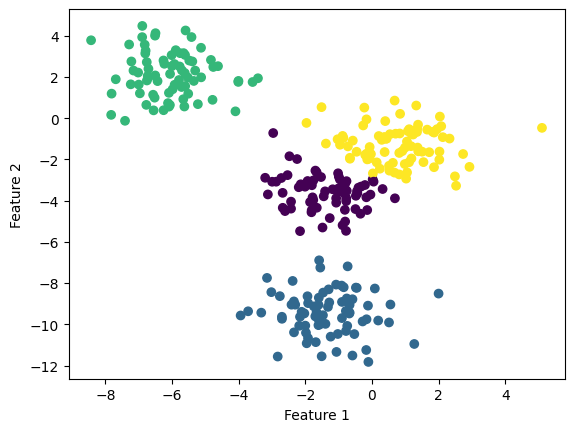

In [7]:
"""21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x, y = make_blobs(n_samples=300, centers=4, random_state=2)

clustering = KMeans(n_clusters=4, random_state=2)

clustering.fit(x)
y_pred = clustering.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [11]:
"""22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels"""

from sklearn.datasets import load_iris
data = load_iris()
x = data.data

from sklearn.cluster import AgglomerativeClustering
agg_clu = AgglomerativeClustering(n_clusters=3)
labels = agg_clu.fit_predict(x)

print("The first 10 predicted labels are: ")
print(labels[: 10])

The first 10 predicted labels are: 
[1 1 1 1 1 1 1 1 1 1]


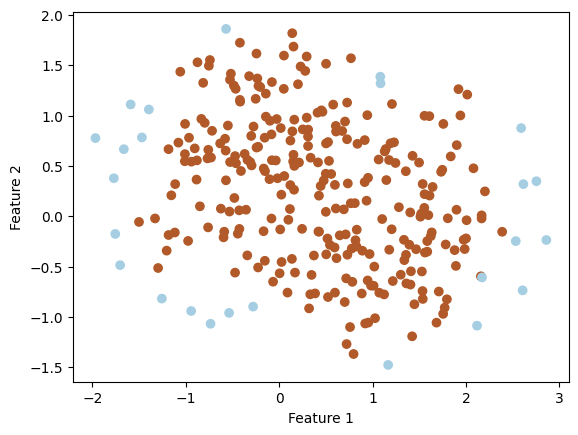

In [16]:
"""23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

x, y = make_moons(n_samples=300, noise=0.5, random_state=2)

cluster = DBSCAN(eps=0.3, min_samples=5)

labels = cluster.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap="Paired")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# LIGHT BLUE ones are the outliers

In [17]:
"""24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster"""

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


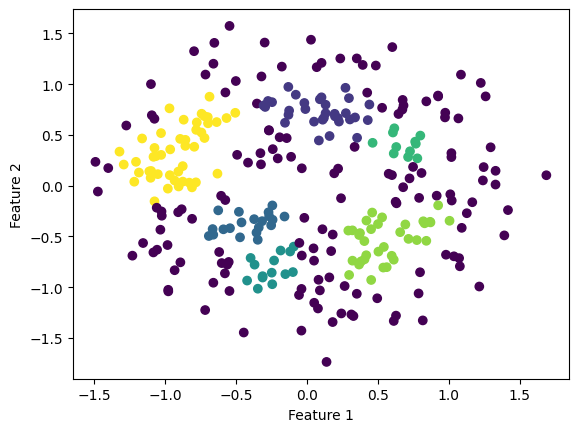

In [23]:
"""25.  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result"""

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

x, y = make_circles(n_samples=300, noise=0.3, random_state=2)
clustering = DBSCAN(eps=0.2, min_samples=10)
labels = clustering.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()